# Portfolio Optimization

This project uses Efficient Frontier to optimize a portfolio.

In [16]:
#import packages
import pandas as pd
from pandas_datareader import data as pdr
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [17]:
#Put in stock tickers for the portfolio
assets = ['GLD','AGG', 'BND', 'LQD']
#Assign initial weights
weights = np.ones(len(assets))/len(assets)

### Portfolio stats

In [18]:
#Stock start and ending date for analysis
startDate = '2010-01-01'
currentDate = datetime.today().strftime('%Y-%m-%d')
currentDate

'2020-09-12'

In [19]:
#Store stock with corresponding price in a dataframe
df = pd.DataFrame()
for stock in assets:
  df[stock] = pdr.DataReader(stock, data_source = 'yahoo', start = startDate, end = currentDate)['Adj Close']

df

,GLD,AGG,BND,LQD
Date,,,,
2010-01-04,109.800003,77.355408,57.886127,70.965721
2010-01-05,109.699997,77.707253,58.055367,71.304649
2010-01-06,111.510002,77.662361,58.033283,71.094505
2010-01-07,110.820000,77.572540,57.989105,71.182610
2010-01-08,111.370003,77.617432,58.047989,71.338509
...,...,...,...,...
2020-09-04,181.639999,118.099998,88.230003,134.949997
2020-09-08,181.289993,118.230003,88.360001,135.080002
2020-09-09,183.050003,118.220001,88.300003,135.169998


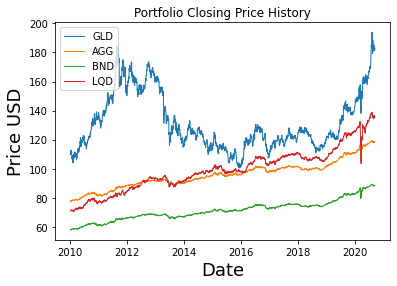

In [20]:
#Visualize Portfolio
title = 'Portfolio Closing Price History'

#Plot the stock price/time
for i in df.columns.values:
  plt.plot(df[i], label = i, linewidth = 1)

plt.title(title)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Price USD', fontsize = 18)
plt.legend(df.columns.values, loc = 'upper left')
plt.show()

In [21]:
#Show returns on stocks
returns = df.pct_change()
returns

,GLD,AGG,BND,LQD
Date,,,,
2010-01-04,NaN,NaN,NaN,NaN
2010-01-05,-0.000911,0.004548,0.002924,0.004776
2010-01-06,0.016500,-0.000578,-0.000380,-0.002947
2010-01-07,-0.006188,-0.001157,-0.000761,0.001239
2010-01-08,0.004963,0.000579,0.001015,0.002190
...,...,...,...,...
2020-09-04,0.002760,-0.004971,-0.005859,-0.010630
2020-09-08,-0.001927,0.001101,0.001473,0.000963
2020-09-09,0.009708,-0.000085,-0.000679,0.000666


In [22]:
#Covariance matrix calculation (annulized)
cov_matrix = returns.cov() * 252
cov_matrix

,GLD,AGG,BND,LQD
GLD,0.025249,0.001741,0.001801,0.002935
AGG,0.001741,0.001613,0.001542,0.002201
BND,0.001801,0.001542,0.001770,0.002390
LQD,0.002935,0.002201,0.002390,0.005135


In [23]:
#Portfolio variance
p_var = np.dot(weights.T, np.dot(cov_matrix, weights))
p_var

0.003686686973731477

In [24]:
#Portfolio volatility(SD)
p_vol = np.sqrt(p_var)
p_vol

0.060718094286064984

In [25]:
#Portfolio annual return
pReturn = np.sum(returns.mean()*weights)*252
pReturn

0.05111681858181004

In [26]:
#Short Summary(Initial)
percent_return = str(round(pReturn, 2)*100)+'%'
percent_vol = str(round(p_vol, 2)*100)+'%'
percent_var = str(round(p_var, 2)*100)+'%'
print('Expected annual return: ' + percent_return)
print('Volatilty: ' + percent_vol)
print('Variance: ' + percent_var)

Expected annual return: 5.0%
Volatilty: 6.0%
Variance: 0.0%


## Portfolio Optimization

In [27]:
pip install PyPortfolioOpt

In [28]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [29]:
#Calculate expected returns and sample covariance matrix of the return of assets
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

#Optimize using max sharpe ratio
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
clean_weights = ef.clean_weights()
print(clean_weights)
ef.portfolio_performance(verbose = True)

OrderedDict([('GLD', 0.0112), ('AGG', 0.35081), ('BND', 0.0), ('LQD', 0.63799)])
Expected annual return: 5.5%
Annual volatility: 5.8%
Sharpe Ratio: 0.60


(0.05457766670080481, 0.05772717348863073, 0.5989842324016578)

## Final asset allocation

In [30]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
#Output the discrete number of stocks for a given amount of money
latestPrices = get_latest_prices(df)
weights = clean_weights
discrete_allocation = DiscreteAllocation(weights, latestPrices, total_portfolio_value = 10000)
portfolio_allocation, remaining_cash = discrete_allocation.lp_portfolio()
print('Asset allocation: ', portfolio_allocation)
print('Cash remaining: ', remaining_cash)

Asset allocation:  {'GLD': 1, 'AGG': 29, 'LQD': 47}
Cash remaining:  22.430152893066406
